## YOLOv2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
yolo = cv2.dnn.readNet("/content/drive/MyDrive/yolo/yolov2.weights", "/content/drive/MyDrive/yolo/yolov2.cfg")
classes = []

In [ ]:
with open("/content/drive/MyDrive/yolo/coco.names", "r") as file:
    classes = [line.strip() for line in file.readlines()]
layer_names = yolo.getLayerNames()
output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]

colorBlue = (0,0,255)
colorGreen = (0,255,0)

In [ ]:
# #Loading Images
# name = "/content/drive/MyDrive/yolo/image.jpg"
p1 = "/content/drive/MyDrive/yolo/p1.jpg"
p2 = "/content/drive/MyDrive/yolo/p2.jpg"
p3 = "/content/drive/MyDrive/yolo/p3.jpg"

In [ ]:
img = cv2.imread(p2)
height, width, channels = img.shape

In [ ]:
# # Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

yolo.setInput(blob)
outputs = yolo.forward(output_layers)
class_ids = []
confidences = []
boxes = []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]]) + " " + str(round(confidences[i], 3))
        cv2.rectangle(img, (x, y), (x + w, y + h), colorGreen, 3)
        cv2.putText(img, label, (x, y - 20), cv2.FONT_HERSHEY_PLAIN, 4, colorBlue, 6)




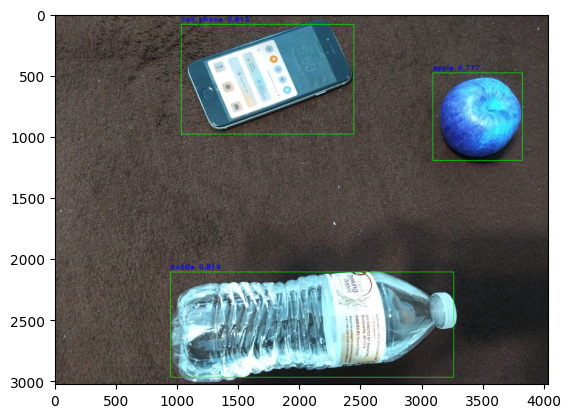

In [ ]:
plt.imshow(img)

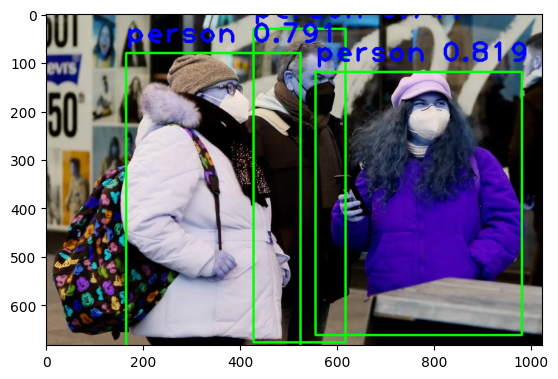

In [ ]:
plt.imshow(img)

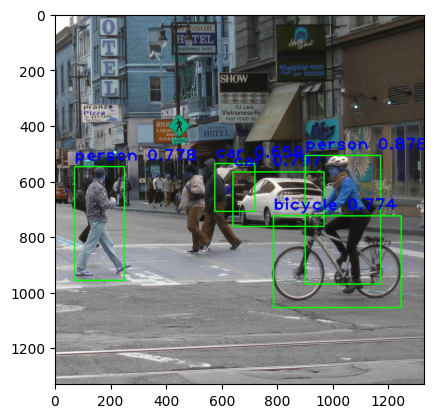

In [ ]:
plt.imshow(img)

## .

In [ ]:
!pip install --upgrade mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [ ]:
!pip install torch==1.8.0+cpu torchvision==0.9.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.8.0+cpu which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but y

In [ ]:
!pip install --upgrade gluoncv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00


## YOLOv3

In [ ]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

/usr/local/lib/python3.9/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.8.0+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [ ]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:06, 33952.53KB/s]                            


In [ ]:
img1 = utils.download('https://media.timeout.com/images/105796970/750/422/image.jpg', path='image.jpg')
img2 = utils.download('https://media.wired.co.uk/photos/62b1d6fcbe42471f6d48e0b4/16:9/w_2560%2Cc_limit/GettyImages-1229614457.jpg', path='GettyImages-1229614457.jpg')
img3 = utils.download('https://api.time.com/wp-content/uploads/2023/03/New-York-City-masks.jpg', path='New-York-City-masks.jpg')

82KB [00:00, 2106.19KB/s]             


1408KB [00:00, 18726.23KB/s]            


100%|██████████| 141/141 [00:00<00:00, 4075.09KB/s]


In [ ]:
x1, image1 = data.transforms.presets.ssd.load_test(img1, short=512)
x2, image2 = data.transforms.presets.ssd.load_test(img2, short=512)
x3, image3 = data.transforms.presets.ssd.load_test(img3, short=512)

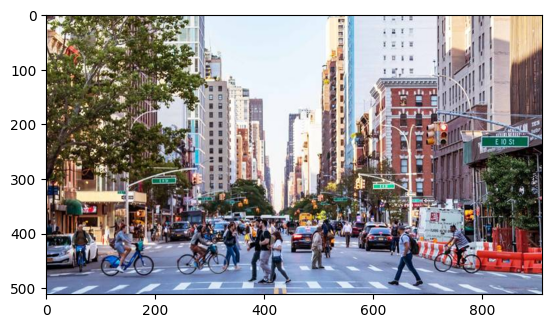

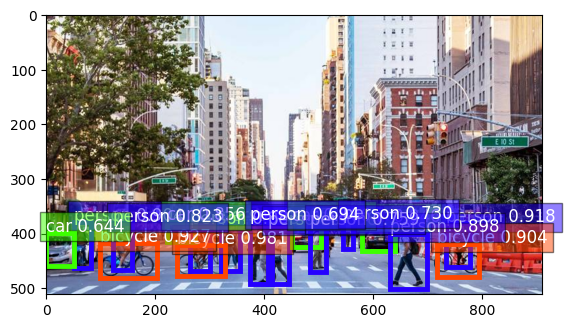

In [ ]:
class_IDs, scores, bounding_boxes = net(x1)
plt.imshow(image1)
ax = utils.viz.plot_bbox(image1, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

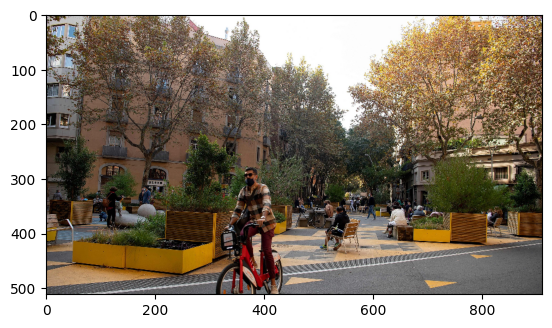

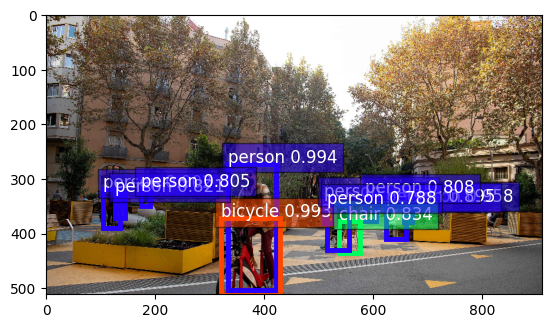

In [ ]:
class_IDs, scores, bounding_boxes = net(x2)
plt.imshow(image2)
ax = utils.viz.plot_bbox(image2, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

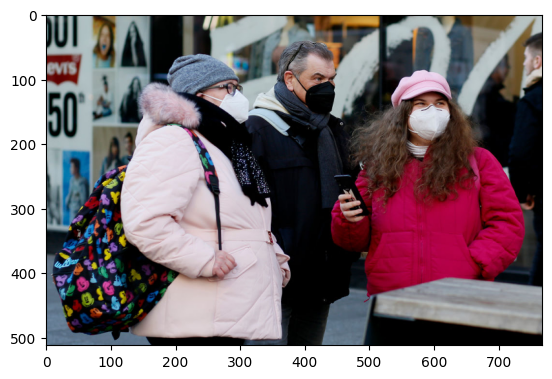

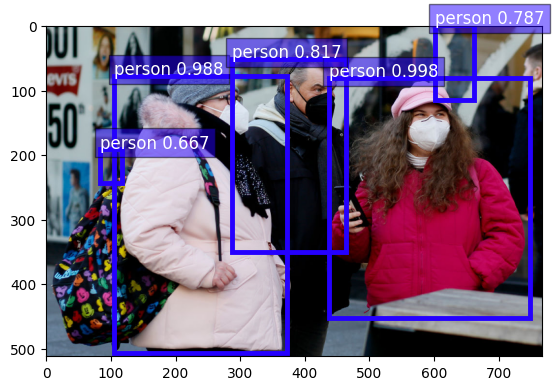

In [ ]:
class_IDs, scores, bounding_boxes = net(x3)
plt.imshow(image3)
ax = utils.viz.plot_bbox(image3, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

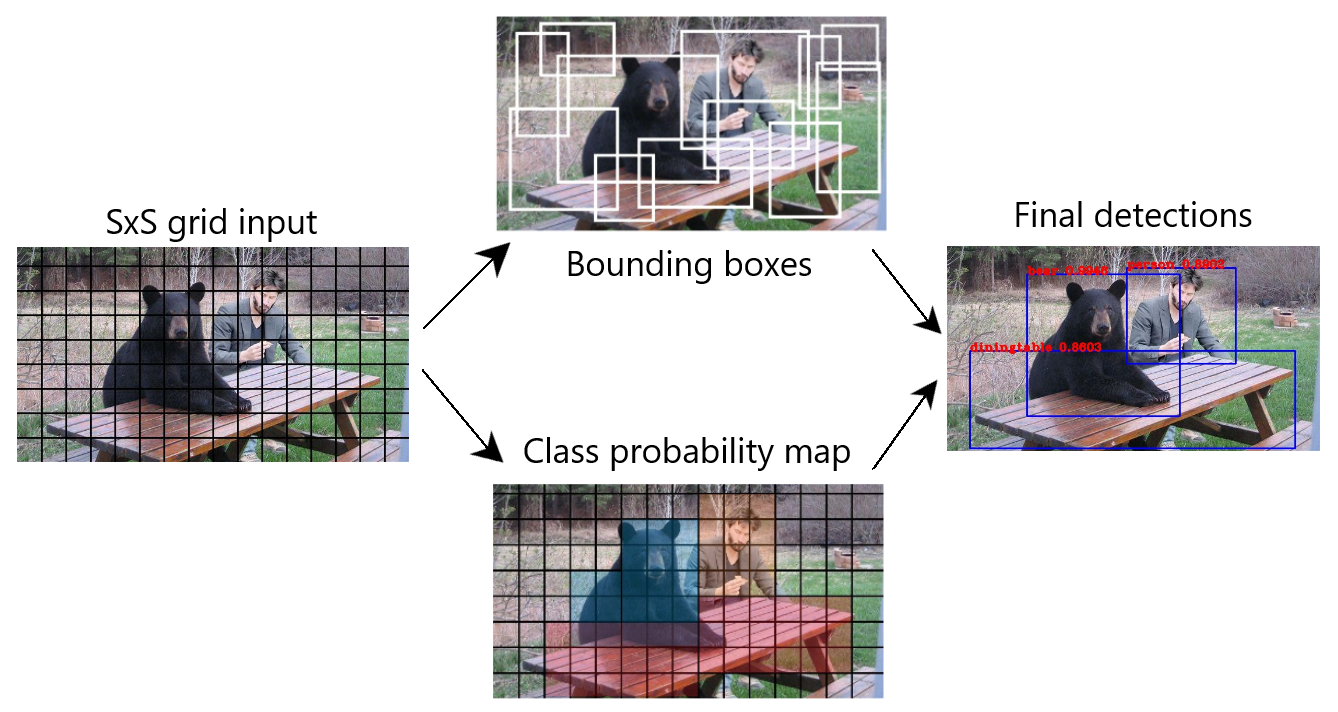